![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [94]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel('BBDD_Hospitalización.xlsx')

# Mostrar las primeras 5 filas del DataFrame
dataset.head()


c:\Users\juank\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [95]:
# Mostrar los tipos de datos de las filas del DataFrame
dataset.dtypes

EDAD                                                                         float64
DIABETES                                                                      object
HOSPITALIZACIÓN ULTIMO MES                                                    object
PSA                                                                          float64
BIOPSIAS PREVIAS                                                              object
VOLUMEN PROSTATICO                                                            object
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       object
NUMERO DE MUESTRAS TOMADAS                                                   float64
CUP                                                                           object
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             object
BIOPSIA                                                                       object
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN IN

In [96]:
# Obtener información sobre el conjunto de datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [97]:
# Obtener estadísticas descriptivas para variables numéricas
dataset.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


In [98]:
# Obtener estadísticas descriptivas para variables categóricas
print(dataset.describe(include='object'))

       DIABETES HOSPITALIZACIÓN ULTIMO MES BIOPSIAS PREVIAS  \
count       568                        568              566   
unique        2                          2                2   
top          NO                         NO               NO   
freq        505                        563              510   

       VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  CUP  \
count                 567                                     568  567   
unique                  2                                       5    2   
top                    SI          FLUOROQUINOLONA_AMINOGLICOSIDO   NO   
freq                  408                                     448  563   

       ENF. CRONICA PULMONAR OBSTRUCTIVA BIOPSIA  \
count                                566     568   
unique                                 4      11   
top                                   NO     NEG   
freq                                 546     322   

       NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENT

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [99]:
# ** ENF. CRONICA PULMONAR OBSTRUCTIVA: Aunque las enfermedades crónicas pueden influir en la salud general del paciente, es posible que la enfermedad pulmonar obstructiva 
# crónica no esté directamente relacionada con la hospitalización después de una biopsia prostática.

# ** VOLUMEN PROSTATICO: A menos que haya evidencia de que un volumen prostático mayor a 40 cm3 está asociado con un mayor riesgo de complicaciones después de la biopsia,
# esta variable podría no ser relevante para predecir la hospitalización.

# ** ANTIBIOTICO UTILIZADO EN LA PROFILAXIS: Aunque la profilaxis antibiótica es importante para prevenir infecciones después de la biopsia prostática, el tipo específico 
# de antibiótico utilizado podría no ser relevante para predecir la hospitalización.

# ** NUMERO DE MUESTRAS TOMADAS: A menos que haya evidencia de que el número de muestras tomadas en la biopsia influya en el riesgo de complicaciones, esta variable podría 
# no ser relevante para predecir la hospitalización.

# CUP: Sus valores están en No, lo cual no inside el la variable objetivo

# ** TIPO DE CULTIVO, AGENTE AISLADO y PATRON DE RESISTENCIA: Estas variables están relacionadas con las complicaciones infecciosas posteriores a la biopsia, pero podrían 
# no ser directamente relevantes para predecir la hospitalización después del procedimiento.

# ** DIAS HOSPITALIZACION MQ y DIAS HOSPITALIZACIÓN UPC: Aunque estas variables están relacionadas con la hospitalización, podrían no ser necesarias si 
# la variable "HOSPITALIZACIÓN" ya indica si el paciente fue hospitalizado o no.

# Selecciono las etiquetas a seleccionar para el análsis, en total de variables seleccionadas 9
etiquetas_a_seleccionar = ['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA', 'BIOPSIAS PREVIAS', 'BIOPSIA', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'FIEBRE', 'ITU', 'HOSPITALIZACION']


# Genero dataframe nuevo sin las variables que no tienen correlación con la variable objetivo de Hospitalización.

data_limpio = dataset.loc[:, etiquetas_a_seleccionar]
    
# revisamos el contenido del nuevo dataframe

data_limpio.head()


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,HOSPITALIZACION
0,53.0,NO,NO,4.0,NO,NEG,1,SI,NO,SI
1,56.0,NO,NO,7.7,NO,NEG,1,SI,NO,SI
2,57.0,NO,NO,29.0,SI,NEG,1,SI,NO,SI
3,56.0,NO,NO,7.0,NO,NEG,1,SI,NO,SI
4,55.0,NO,NO,29.0,SI,NEG,1,SI,NO,SI


In [100]:
data_limpio['HOSPITALIZACION']

0       SI
1       SI
2       SI
3       SI
4       SI
      ... 
565     NO
566     NO
567     NO
568    NaN
569    NaN
Name: HOSPITALIZACION, Length: 570, dtype: object

In [101]:
data_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 10 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   BIOPSIA                                                                    568 non-null    object 
 6   NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICA

In [102]:
# Ajustar valores categorico a numéricos
data_limpio['DIABETES'] = data_limpio['DIABETES'].replace({'NO': 0, 'SI': 1})
data_limpio['HOSPITALIZACIÓN ULTIMO MES'] = data_limpio['HOSPITALIZACIÓN ULTIMO MES'].replace({'NO': 0, 'SI': 1})

#data_limpio['PSA'].fillna(method='ffill', inplace=True) # Cambiar valores nulos 
data_limpio['PSA'].fillna(data_limpio['PSA'].median(), inplace=True)  # Imputar valores NaN con la mediana

data_limpio['BIOPSIAS PREVIAS'] = data_limpio['BIOPSIAS PREVIAS'].replace({'NO': 0, 'SI': 1})
#data_limpio['BIOPSIAS PREVIAS'].fillna(-1, inplace=True)
data_limpio['BIOPSIAS PREVIAS'].fillna(data_limpio['BIOPSIAS PREVIAS'].median(), inplace=True)  # Imputar valores NaN/vacíos con la mediana

data_limpio['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = data_limpio['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace({'NO': -1})
data_limpio['FIEBRE'] = data_limpio['FIEBRE'].replace({'NO': 0, 'SI': 1})
data_limpio['ITU'] = data_limpio['ITU'].replace({'NO': 0, 'SI': 1})

data_limpio['HOSPITALIZACION'] = data_limpio['HOSPITALIZACION'].replace({'NO': 0, 'SI': 1})
data_limpio['HOSPITALIZACION'].fillna(data_limpio['HOSPITALIZACION'].median(), inplace=True)  # Imputar valores NaN/vacíos con la mediana


#data_limpio['HOSPITALIZACION'].fillna(-1, inplace=True)
#data_limpio['PSA'].fillna(method='ffill', inplace=True) # Cambiar valores nulos 


C:\Users\juank\AppData\Local\Temp\ipykernel_1832\3980852500.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_limpio['DIABETES'] = data_limpio['DIABETES'].replace({'NO': 0, 'SI': 1})
C:\Users\juank\AppData\Local\Temp\ipykernel_1832\3980852500.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_limpio['HOSPITALIZACIÓN ULTIMO MES'] = data_limpio['HOSPITALIZACIÓN ULTIMO MES'].replace({'NO': 0, 'SI': 1})
C:\Users\juank\AppData\Local\Temp\ipykernel_1832\3980852500.py:6: FutureWarning: A value is trying to be set on a copy o

In [103]:
# Verificamos el Balaceo de las etiquetas
data_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 10 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    float64
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    float64
 3   PSA                                                                        570 non-null    float64
 4   BIOPSIAS PREVIAS                                                           570 non-null    float64
 5   BIOPSIA                                                                    568 non-null    object 
 6   NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICA

In [104]:
data_limpio.tail(10)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,HOSPITALIZACION
560,57.0,0.0,0.0,4.80,0.0,NEG,-1.0,0.0,0.0,0.0
561,75.0,0.0,0.0,75.00,0.0,ADENOCARCINOMA GLEASON 8,-1.0,0.0,0.0,0.0
562,78.0,0.0,0.0,9.30,0.0,NEG,-1.0,0.0,0.0,0.0
563,67.0,0.0,0.0,6.00,0.0,ADENOCARCINOMA GLEASON 6,-1.0,0.0,0.0,0.0
564,64.0,0.0,0.0,4.80,0.0,ADENOCARCINOMA GLEASON 7,-1.0,0.0,0.0,0.0
565,69.0,0.0,0.0,4.43,0.0,NEG,-1.0,0.0,0.0,0.0
566,67.0,0.0,0.0,8.00,0.0,ADENOCARCINOMA GLEASON 7,-1.0,0.0,0.0,0.0
567,59.0,0.0,0.0,9.00,1.0,NEG,-1.0,0.0,0.0,0.0
568,NaN,NaN,NaN,8.00,0.0,NaN,NaN,NaN,NaN,0.0
569,NaN,NaN,NaN,8.00,0.0,NaN,NaN,NaN,NaN,0.0


In [105]:
# Elimino las dos últimas filas del data
data_limpio.drop(index=data_limpio.tail(2).index, inplace=True)
data_limpio.tail(10)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,HOSPITALIZACION
558,55.0,0.0,0.0,5.00,0.0,ADENOCARCINOMA GLEASON 7,-1.0,0.0,0.0,0.0
559,70.0,1.0,0.0,18.00,0.0,NEG,-1.0,0.0,0.0,0.0
560,57.0,0.0,0.0,4.80,0.0,NEG,-1.0,0.0,0.0,0.0
561,75.0,0.0,0.0,75.00,0.0,ADENOCARCINOMA GLEASON 8,-1.0,0.0,0.0,0.0
562,78.0,0.0,0.0,9.30,0.0,NEG,-1.0,0.0,0.0,0.0
563,67.0,0.0,0.0,6.00,0.0,ADENOCARCINOMA GLEASON 6,-1.0,0.0,0.0,0.0
564,64.0,0.0,0.0,4.80,0.0,ADENOCARCINOMA GLEASON 7,-1.0,0.0,0.0,0.0
565,69.0,0.0,0.0,4.43,0.0,NEG,-1.0,0.0,0.0,0.0
566,67.0,0.0,0.0,8.00,0.0,ADENOCARCINOMA GLEASON 7,-1.0,0.0,0.0,0.0
567,59.0,0.0,0.0,9.00,1.0,NEG,-1.0,0.0,0.0,0.0


In [106]:
# Verificamos el Balaceo de las etiquetas y se termina la apuesta a punto del dataset a trabajar
data_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 10 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    float64
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    float64
 3   PSA                                                                        568 non-null    float64
 4   BIOPSIAS PREVIAS                                                           568 non-null    float64
 5   BIOPSIA                                                                    568 non-null    object 
 6   NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICA

    Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

Con el método describe()  nos muestra las estadísticas descriptivas básicas de la etiqueta PSA los cuales contine valores numericos.

In [107]:
data_limpio['PSA'].describe()

count    568.000000
mean      13.234278
std       15.619830
min        0.600000
25%        5.675000
50%        8.000000
75%       15.000000
max      100.000000
Name: PSA, dtype: float64

Con el uso de Histogramas, visualizamos la distribución de las variable numericas para nuesro caso PSA

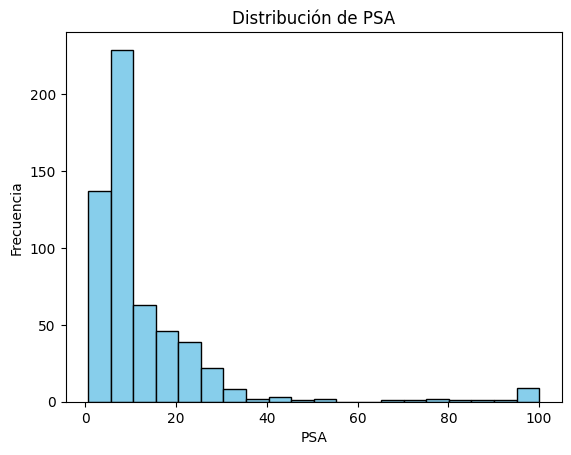

In [108]:
# Histograma de la variable PSA
plt.hist(data_limpio['PSA'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('PSA')
plt.ylabel('Frecuencia')
plt.title('Distribución de PSA')
plt.show()

Con el diagrama de caja detectamos posibles valores atípicos.

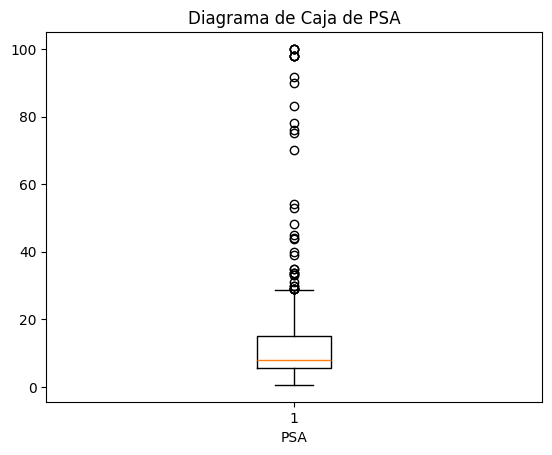

In [109]:
# Diagrama de caja para la variable PSA
plt.boxplot(data_limpio['PSA'])
plt.xlabel('PSA')
plt.title('Diagrama de Caja de PSA')
plt.show()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Para relacionar si contamos datos atípicos en nuestra columna PSA, y teniendo en cuenta que los valores de PSA por encima de 10 ng/ml se consideran anormales, consulto el número total de muestras y el numero de muestras que sobrepasan del valor de 10.

In [110]:
print(data_limpio['PSA'].count())
print(data_limpio[data_limpio['PSA']>10]['PSA'].count())

568
206


De acuerdo a lo anterior, tenemos el 36.28% de datos atípicos, los cuales de ven reflejados en la grafica boxplot, en donde se observa que efectivamente se visualizan outliers o valores atípicos con 206 valores  superiores a 10, de los 568 valores de la muestra total, en donde se siguere pensar, que por el valor de estos datos se consideran errores y no tenerlos en cuenta al aplical el modelo no supercisado de ML. 

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

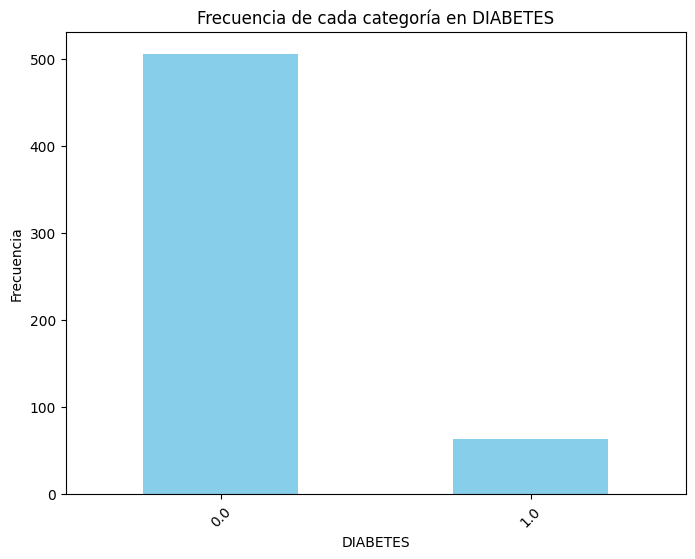

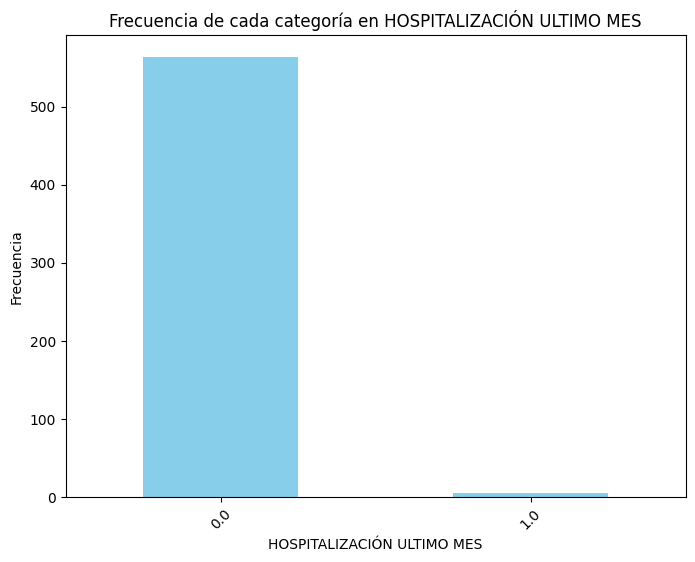

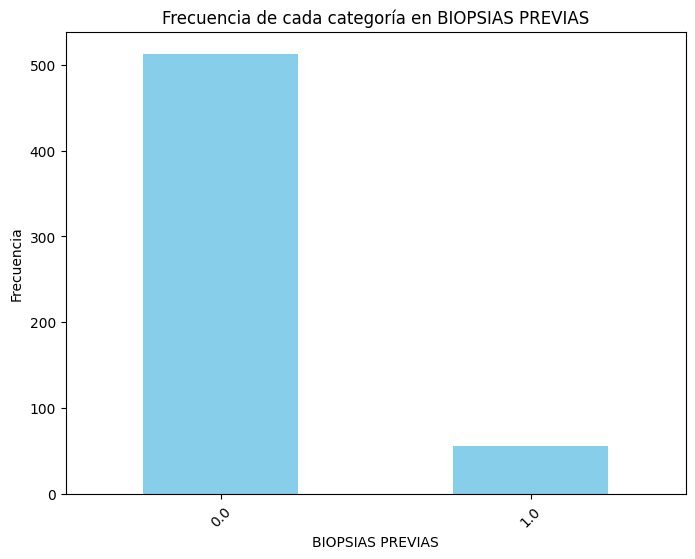

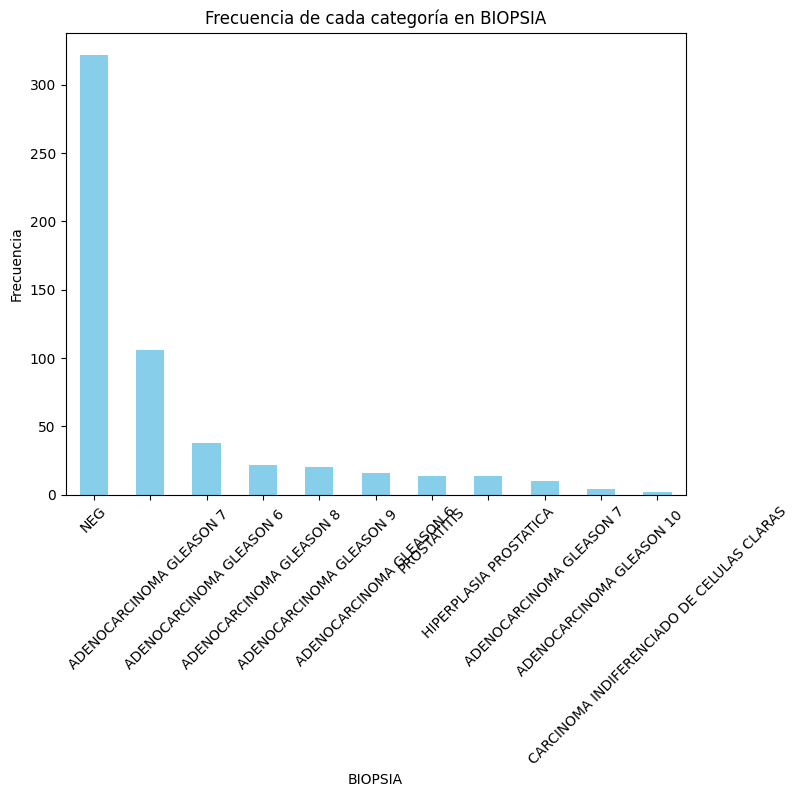

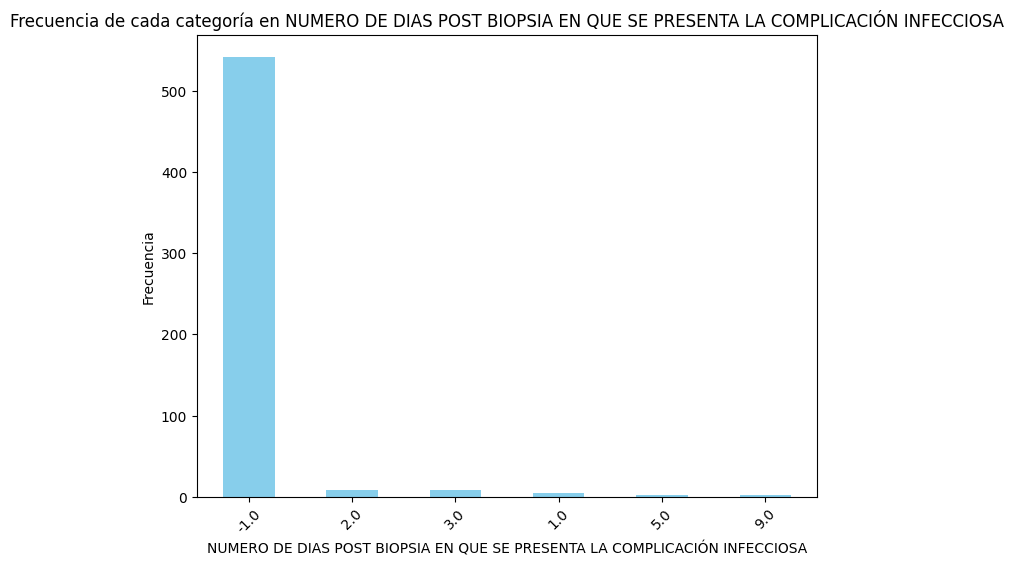

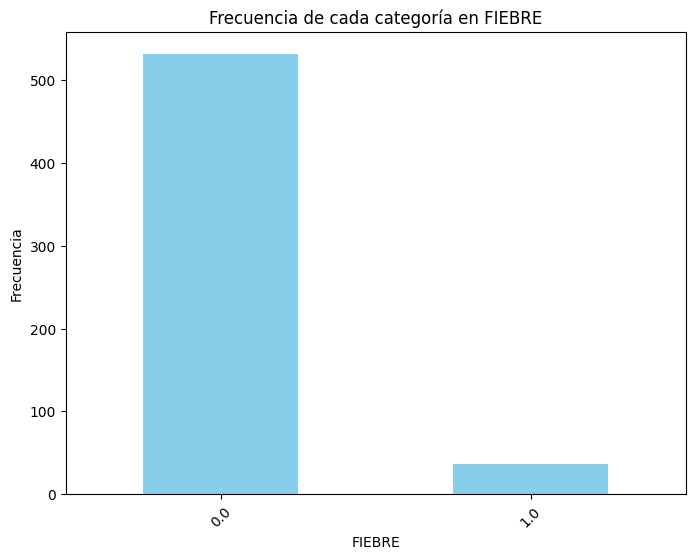

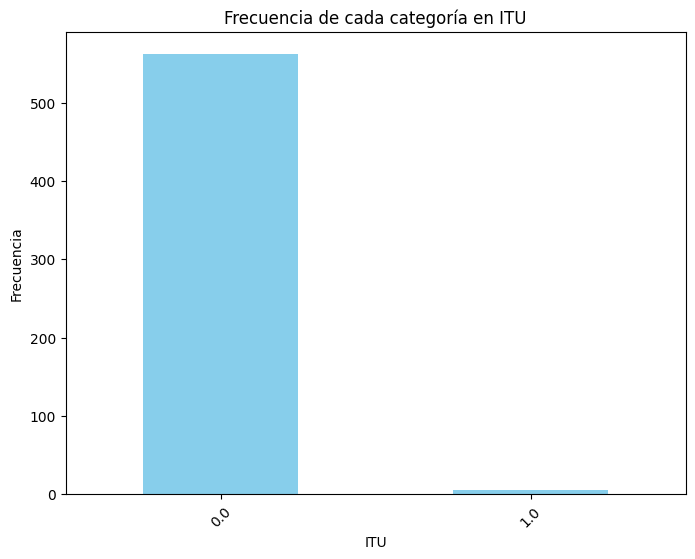

In [111]:
etiquetas_categoricas = [ 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'BIOPSIA', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'FIEBRE', 'ITU']

# Visualización de las frecuencias de cada categoría para cada variable categórica
for variable in etiquetas_categoricas:
    plt.figure(figsize=(8, 6))
    data_limpio[variable].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.title('Frecuencia de cada categoría en {}'.format(variable))
    plt.xticks(rotation=45)
    plt.show()

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

Este anáslisis e intervención se realizó al principio, con el método info() nos proporciona cuales categorias tienen vacios o nulos, de los cuales son:

#   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 
 la etiqueta PSA es una variable numérica y  BIOPSIAS PREVIAS en una variable categorica, para el primer caso, se reemplazan los valores vacios con la mediana por detectar que contiene valores atipicos y el la variable categorica reemplamos por la moda.

Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [112]:
# La normalización es especialmente útil cuando tienes múltiples variables numéricas con escalas muy diferentes entre sí, ya que puede ayudar a evitar que las 
# variables con valores más grandes dominen el análisis. Al cer PSA mi única variable númerica, considero que no es necesario normalizar. 

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [113]:
# Estas transformaciones se realizan al inicio de la practica, en donde la información está relacionado en el dataframe data_limpio.

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [114]:
data_limpio.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,HOSPITALIZACION
0,53.0,0.0,0.0,4.0,0.0,NEG,1.0,1.0,0.0,1.0
1,56.0,0.0,0.0,7.7,0.0,NEG,1.0,1.0,0.0,1.0
2,57.0,0.0,0.0,29.0,1.0,NEG,1.0,1.0,0.0,1.0
3,56.0,0.0,0.0,7.0,0.0,NEG,1.0,1.0,0.0,1.0
4,55.0,0.0,0.0,29.0,1.0,NEG,1.0,1.0,0.0,1.0


In [115]:
# Al realizar proceso de correlación, me indica que el data no ee completamente numerico, y se ve que en la etiqueta BIOPSIA, contiene datos clasificatorios, 
# se porcede a generar dummies a la respectiva etiqueta

#  Genero la etiqueta BIOPSIAS con dumies
data_categorica=data_limpio

dummies_biopsias = pd.get_dummies(data_categorica['BIOPSIA'], prefix='BIOPSIA')

# Concatenar las variables dummy al DataFrame original
data_elaborada = pd.concat([data_categorica, dummies_biopsias], axis=1)

#eliminamos la Etiqueta BIOPSIAS
data_elaborada = data_elaborada.drop('BIOPSIA', axis= 1)

# Se asegura la etiqueta Hospitalización para sealizar la correlación
hospi = data_elaborada['HOSPITALIZACION']

#eliminamos la Etiqueta HOSPITALIZACION, por considerar que es la etiqueta resultado
data_elaborada = data_elaborada.drop('HOSPITALIZACION', axis= 1)

data_elaborada.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,BIOPSIA_ADENOCARCINOMA GLEASON 10,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,BIOPSIA_PROSTATITIS
0,53.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,False,False,False,False,False,False,False,False,False,True,False
1,56.0,0.0,0.0,7.7,0.0,1.0,1.0,0.0,False,False,False,False,False,False,False,False,False,True,False
2,57.0,0.0,0.0,29.0,1.0,1.0,1.0,0.0,False,False,False,False,False,False,False,False,False,True,False
3,56.0,0.0,0.0,7.0,0.0,1.0,1.0,0.0,False,False,False,False,False,False,False,False,False,True,False
4,55.0,0.0,0.0,29.0,1.0,1.0,1.0,0.0,False,False,False,False,False,False,False,False,False,True,False


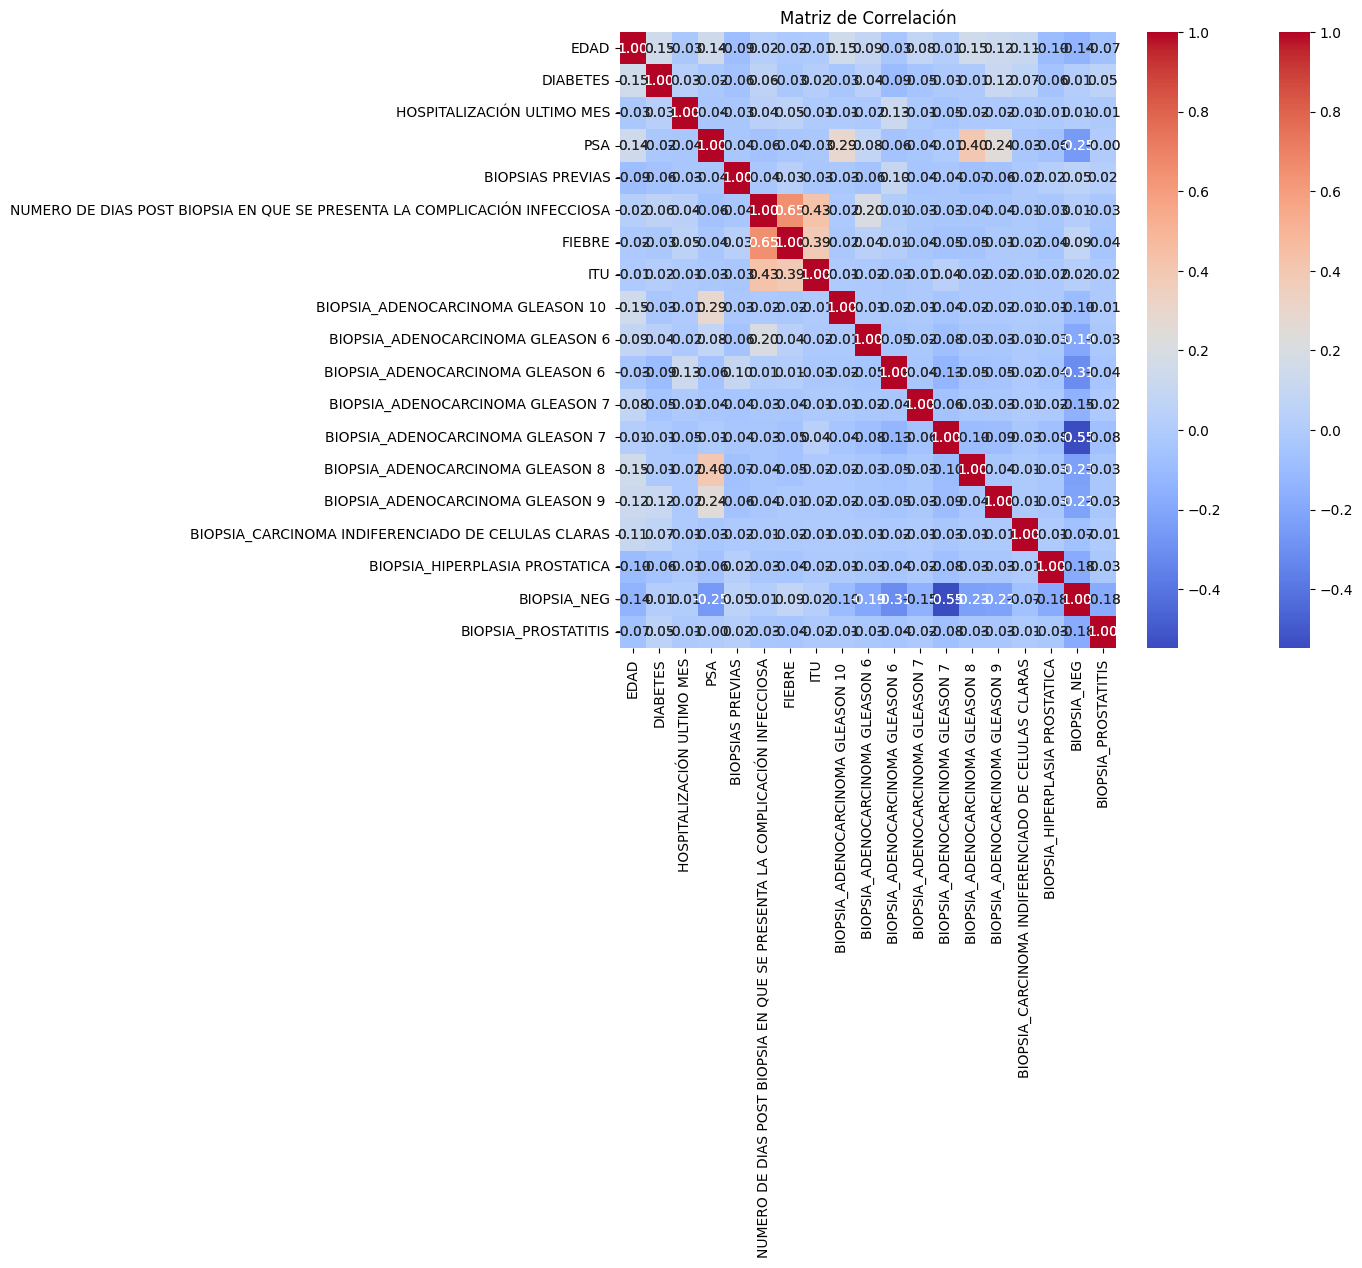

In [116]:
# Calcular la matriz de correlación
matriz_correlacion = data_elaborada.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
heatmap = sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [121]:
# Unir el dataframe con la etiequeta resultado Hospitalización
data_final = pd.concat([data_elaborada, hospi], axis=1)

# Guardar el DataFrame en un archivo .cvs
data_final.to_csv('data_normalizada.csv', index=False)
